# 1) Resumo

Neste notebook iremos fazer um seleção mais fina das variaveis explicativas. O método aqui utilizado será através da matriz de correlação. As colunas com o módulo da correlação maiores que **0.9** serão excluidas, deixando apenas uma coluna dessa variaveis altamente correlacionadas. A seleção de qual coluna ira ficar é a ordem de comparação apenas. Os coeficientes de correlação foram calculados usando o método padrão de **Pearson**. 

---
# 2) Pre-analise

## 2.1) Importando libs

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from featurewiz import featurewiz

pd.set_option('display.max_rows', 50)

Imported featurewiz: advanced feature engg and selection library. Version=0.0.42
output = featurewiz(dataname, target, corr_limit=0.70,
                    verbose=2, sep=',', header=0, test_data='',
                    feature_engg='', category_encoders='')
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


## 2.2) Minhas Funções

In [2]:
import sys
sys.path.insert(1, "../../")
from src.info import dimensao_dados, variaveis_explicativas, mostra_todas_as_colunas_com,escreve_somente_as_colunas
from src.plota_graficos import plota_matriz_correlacao

---
# 3) Selecionando os dados

## 3.1) Importando os dados

In [3]:
path = "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/Dados/Tratados/dados_tratados_por_paciente.csv"
path = "../../Dados/Tratados/dados_tratados_por_paciente.csv"
dados = pd.read_csv(path)
dados.head(n=5)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,ICU
0,1,0.111111,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.515528,-0.351328,-0.756272,-1.000000,1
2,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-1.000000,-0.883669,-0.870968,-0.953536,0
4,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.860870,-0.714460,-1.000000,-0.975891,0


## 3.2) Analizando os dados

### Dimensação da matriz atual

In [4]:
dimensao_dados(dados)

Numero de linhas : 351 
Numero de colunas: 121 


### Possiveis variaveis explicativas da base de dados

In [7]:
_ = variaveis_explicativas(dados)

 col[  0] -> AGE_ABOVE65                         col[  1] -> AGE_PERCENTIL                       
 col[  2] -> GENDER                              col[  3] -> DISEASE GROUPING 1                  
 col[  4] -> DISEASE GROUPING 2                  col[  5] -> DISEASE GROUPING 3                  
 col[  6] -> DISEASE GROUPING 4                  col[  7] -> DISEASE GROUPING 5                  
 col[  8] -> DISEASE GROUPING 6                  col[  9] -> HTN                                 
 col[ 10] -> IMMUNOCOMPROMISED                   col[ 11] -> OTHER                               
 col[ 12] -> ALBUMIN_MEDIAN                      col[ 13] -> ALBUMIN_MEAN                        
 col[ 14] -> ALBUMIN_MIN                         col[ 15] -> ALBUMIN_MAX                         
 col[ 16] -> BE_VENOUS_MEDIAN                    col[ 17] -> BE_VENOUS_MEAN                      
 col[ 18] -> BE_VENOUS_MIN                       col[ 19] -> BE_VENOUS_MAX                       
 col[ 20] -> BLAST_M

## 3.3)  Matriz de Correlação

In [8]:
matriz_coor = dados.iloc[:,:-1].corr().abs()
matriz_coor.head(n=10)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL
AGE_ABOVE65,1.000000,0.874687,0.029841,0.286508,0.050972,0.165299,0.032275,0.313978,0.009293,0.335941,...,0.133712,0.002652,0.003712,0.043829,0.011517,0.033734,0.020932,0.007714,0.003837,0.034106
AGE_PERCENTIL,0.874687,1.000000,0.053109,0.302582,0.057553,0.133116,0.013922,0.334422,0.045804,0.328727,...,0.139455,0.010333,0.001396,0.029530,0.016741,0.030959,0.037437,0.012486,0.005399,0.032385
GENDER,0.029841,0.053109,1.000000,0.028176,0.002127,0.065530,0.070150,0.020690,0.031159,0.019801,...,0.103040,0.006446,0.025511,0.032169,0.042625,0.028108,0.005215,0.024874,0.031734,0.027365
DISEASE GROUPING 1,0.286508,0.302582,0.028176,1.000000,0.192547,0.271899,0.015883,0.332639,0.187614,0.496748,...,0.006411,0.005622,0.000257,0.114158,0.003616,0.035530,0.013522,0.004099,0.002569,0.036798
DISEASE GROUPING 2,0.050972,0.057553,0.002127,0.192547,1.000000,0.084270,0.114763,0.112739,0.033376,0.116600,...,0.005424,0.026989,0.011481,0.002483,0.013343,0.032637,0.047747,0.001245,0.015424,0.032616
DISEASE GROUPING 3,0.165299,0.133116,0.065530,0.271899,0.084270,1.000000,0.308800,0.293017,0.262946,0.465959,...,0.109951,0.015156,0.012054,0.017156,0.034846,0.007099,0.022276,0.005435,0.033030,0.005576
DISEASE GROUPING 4,0.032275,0.013922,0.070150,0.015883,0.114763,0.308800,1.000000,0.128163,0.164226,0.134550,...,0.010396,0.047068,0.034231,0.027601,0.000463,0.009252,0.044475,0.034502,0.002428,0.010201
DISEASE GROUPING 5,0.313978,0.334422,0.020690,0.332639,0.112739,0.293017,0.128163,1.000000,0.120473,0.453608,...,0.001611,0.035575,0.070951,0.014458,0.061686,0.090996,0.033720,0.074654,0.069939,0.090109
DISEASE GROUPING 6,0.009293,0.045804,0.031159,0.187614,0.033376,0.262946,0.164226,0.120473,1.000000,0.201224,...,0.019606,0.011543,0.040767,0.032597,0.050204,0.082756,0.006031,0.039073,0.046738,0.085311
HTN,0.335941,0.328727,0.019801,0.496748,0.116600,0.465959,0.134550,0.453608,0.201224,1.000000,...,0.014293,0.087527,0.085239,0.147106,0.047385,0.091938,0.091265,0.071135,0.036919,0.091473


### Matriz de correlação com correlações sem tratamento

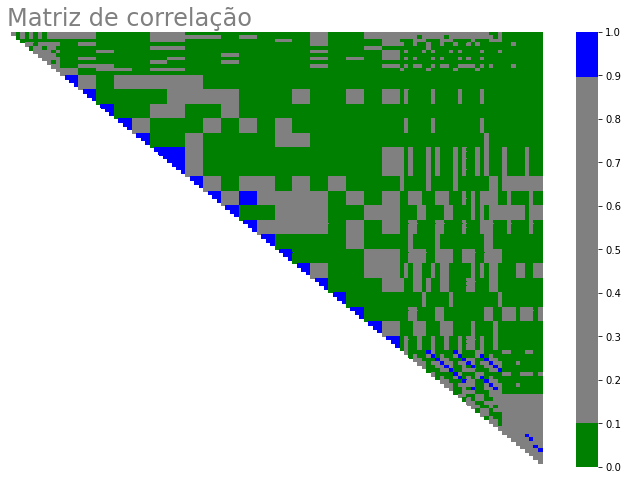

In [9]:
plota_matriz_correlacao(dados, matriz='upper')

> Retirando as colunas com os valore de correlação maiores que **0.9** (metodo de pearson). A cor **azul** são valores entre **[0.9 e 1.0]**. A cor **cinza** são valores entre **[0.1 e 0.8]**. A cor verde são valores entre **[0 e 0.1]**.

You supplied axis = 1
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
Shape of your Data Set loaded: (351, 121)
Loading test data...
    Filename is an empty string or file not able to be loaded
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    120 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
No GPU active on this device
    Running XGBoost using CPU parameters
Removing 0 columns from further processing since ID or low information variables
    After removing redundant variables from further processing, features left = 120
#### Single_Label Binary_Classification Feature Selection Started ####
Searching for highly correlated variables from 120 variables using SULOV method
#####  SULOV : Searching for Uncorrelated List Of Variables (takes time..

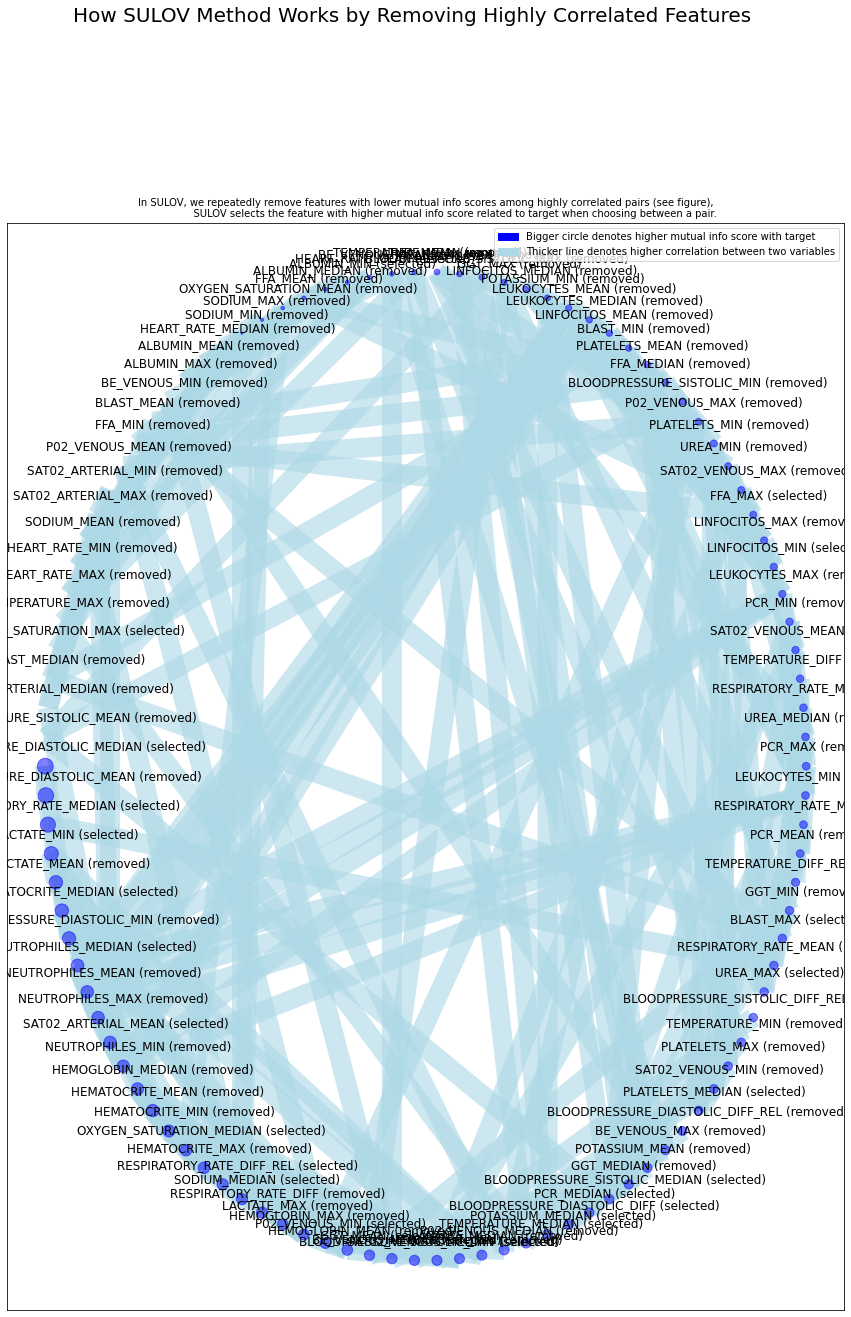

    Adding 0 categorical variables to reduced numeric variables  of 44
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 44 
    Finding Important Features using Boosted Trees algorithm...
        using 44 variables...
        using 35 variables...
        using 26 variables...
        using 17 variables...
        using 8 variables...
Selected 25 important features from your dataset
    Time taken (in seconds) = 8
Returning list of 25 important features and dataframe.


In [10]:
colunas_que_sobraram, dados_featurewiz = featurewiz(dados, axis=1, target='ICU', corr_limit=0.90,verbose=0)

In [11]:
colunas_que_sobraram

['UREA_MAX',
 'BE_VENOUS_MEDIAN',
 'RESPIRATORY_RATE_DIFF_REL',
 'IMMUNOCOMPROMISED',
 'AGE_PERCENTIL',
 'PCR_MEDIAN',
 'RESPIRATORY_RATE_MIN',
 'SAT02_VENOUS_MEDIAN',
 'LACTATE_MIN',
 'P02_VENOUS_MIN',
 'BLOODPRESSURE_DIASTOLIC_MEDIAN',
 'HTN',
 'RESPIRATORY_RATE_MEDIAN',
 'PLATELETS_MEDIAN',
 'RESPIRATORY_RATE_MAX',
 'LINFOCITOS_MIN',
 'NEUTROPHILES_MEDIAN',
 'FFA_MAX',
 'SODIUM_MEDIAN',
 'ALBUMIN_MIN',
 'POTASSIUM_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_DIFF',
 'TEMPERATURE_DIFF_REL',
 'HEART_RATE_MEAN',
 'OXYGEN_SATURATION_MAX']

In [12]:
dados_featurewiz.head(n=10)

,UREA_MAX,BE_VENOUS_MEDIAN,RESPIRATORY_RATE_DIFF_REL,IMMUNOCOMPROMISED,AGE_PERCENTIL,PCR_MEDIAN,RESPIRATORY_RATE_MIN,SAT02_VENOUS_MEDIAN,LACTATE_MIN,P02_VENOUS_MIN,...,NEUTROPHILES_MEDIAN,FFA_MAX,SODIUM_MEDIAN,ALBUMIN_MIN,POTASSIUM_MEDIAN,BLOODPRESSURE_DIASTOLIC_DIFF,TEMPERATURE_DIFF_REL,HEART_RATE_MEAN,OXYGEN_SATURATION_MAX,ICU
0,-0.836145,-1.0,-1.000000,0.0,0.111111,-0.875236,-0.500000,0.345679,1.000000,-0.704142,...,-0.868747,-0.742004,-0.028571,0.605263,-0.518519,-1.000000,-1.000000,-0.283019,0.736842,1
1,-0.836145,-1.0,-0.756272,0.0,-1.000000,-0.939887,-0.714286,0.345679,1.000000,-0.704142,...,-0.412965,-0.742004,0.085714,0.605263,-0.703704,-0.547826,-1.000000,-0.048218,1.000000,1
2,-0.937349,-1.0,-1.000000,1.0,-0.333333,-0.503592,-0.357143,0.580247,-0.828421,-0.633136,...,-0.784714,-0.194030,0.200000,-0.263158,-0.777778,-1.000000,-1.000000,-0.528302,0.684211,0
3,-0.903614,-1.0,-0.870968,0.0,-1.000000,-0.990926,-0.571429,0.345679,1.000000,-0.704142,...,-0.812725,-0.829424,0.142857,0.605263,-0.592593,-1.000000,-0.953536,0.160377,0.894737,0
4,-0.884337,-1.0,-1.000000,0.0,-1.000000,-0.997732,-0.428571,0.345679,1.000000,-0.704142,...,-0.846339,-0.742004,0.085714,0.605263,-0.666667,-0.826087,-0.975891,-0.537736,0.842105,0
5,-0.951807,-1.0,-1.000000,1.0,0.333333,-0.750095,-0.500000,0.345679,1.000000,-0.704142,...,-0.947579,-0.742004,-0.257143,0.605263,-0.962963,-1.000000,-1.000000,-0.415094,0.894737,0
6,-0.865060,-1.0,-1.000000,0.0,-0.777778,-0.999244,-0.285714,0.345679,1.000000,-0.704142,...,-0.789916,-0.742004,-0.142857,0.605263,-0.703704,-1.000000,-1.000000,-0.584906,0.842105,0
7,-0.874699,-1.0,-1.000000,0.0,-0.111111,-0.798110,-0.500000,0.345679,-0.952572,-0.704142,...,-0.851140,-0.742004,-0.600000,0.605263,-0.777778,-1.000000,-1.000000,-0.320755,0.789474,0
8,-0.869880,-1.0,-1.000000,0.0,0.555556,-0.996597,-0.571429,0.345679,1.000000,-0.704142,...,-0.943177,-0.742004,0.066667,0.605263,-0.481481,-1.000000,-1.000000,-0.320755,0.842105,0
9,-0.744578,-1.0,-1.000000,0.0,0.555556,-0.462004,-0.571429,0.345679,1.000000,-0.704142,...,-0.875550,-0.742004,0.028571,0.605263,-0.629630,-1.000000,-1.000000,-0.754717,0.789474,0


### Matriz de correlação após o tratamento com featurewiz 

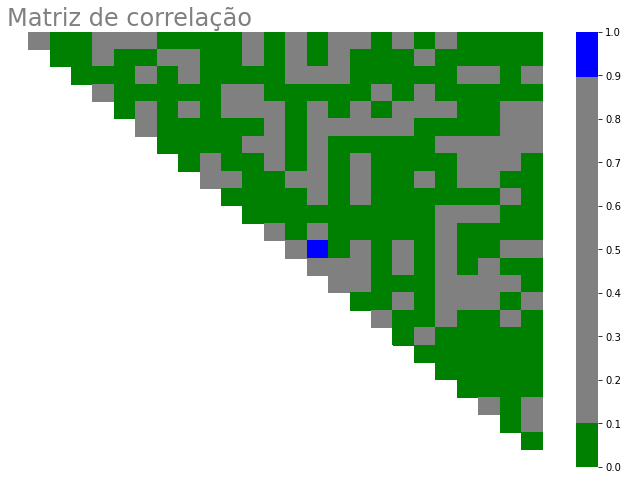

In [13]:
plota_matriz_correlacao(dados_featurewiz, matriz='upper')

> Agora pode-se oberserva que as correlações entre as variaveis são sem abaixo de 0.9.

In [14]:
dimensao_dados(dados_featurewiz)

Numero de linhas : 351 
Numero de colunas: 26 


### lista das variaveis explicativa com baixa correlação

In [15]:
_ = variaveis_explicativas(dados_featurewiz)

 col[  0] -> UREA_MAX                            col[  1] -> BE_VENOUS_MEDIAN                    
 col[  2] -> RESPIRATORY_RATE_DIFF_REL           col[  3] -> IMMUNOCOMPROMISED                   
 col[  4] -> AGE_PERCENTIL                       col[  5] -> PCR_MEDIAN                          
 col[  6] -> RESPIRATORY_RATE_MIN                col[  7] -> SAT02_VENOUS_MEDIAN                 
 col[  8] -> LACTATE_MIN                         col[  9] -> P02_VENOUS_MIN                      
 col[ 10] -> BLOODPRESSURE_DIASTOLIC_MEDIAN      col[ 11] -> HTN                                 
 col[ 12] -> RESPIRATORY_RATE_MEDIAN             col[ 13] -> PLATELETS_MEDIAN                    
 col[ 14] -> RESPIRATORY_RATE_MAX                col[ 15] -> LINFOCITOS_MIN                      
 col[ 16] -> NEUTROPHILES_MEDIAN                 col[ 17] -> FFA_MAX                             
 col[ 18] -> SODIUM_MEDIAN                       col[ 19] -> ALBUMIN_MIN                         
 col[ 20] -> POTASSI

> Os dados finais tem **29** variaveis explicativas selecionadas.

# 4) Salvando os dados

In [16]:
path_out = '../../Dados/Tratados/'
dados_featurewiz.to_csv(path_out+'dados_featurewiz.csv'
                       , index_label=False)

In [17]:
escreve_somente_as_colunas(dados_featurewiz
                          ,path_out+'dados_featurewiz_colunas.csv')

---
Navegação:

[Exploração e limpeza de dados](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/Exploratorios/explaracao_limpezada.ipynb)

[Retornar para README principal](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final)

---